### Buisness Case

Purpose: to detect a situation in which fire threatens people
Stakeholder: fire department working on early warning system and
response to fire threats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import MyFunc as mf
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
import optuna


2024-06-07 15:49:30,394 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "DiversityScore" from "premium_primitives.diversity_score" because a primitive with that name already exists in "nlp_primitives.diversity_score"
2024-06-07 15:49:30,394 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "LSA" from "premium_primitives.lsa" because a primitive with that name already exists in "nlp_primitives.lsa"
2024-06-07 15:49:30,394 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "MeanCharactersPerSentence" from "premium_primitives.mean_characters_per_sentence" because a primitive with that name already exists in "nlp_primitives.mean_characters_per_sentence"
2024-06-07 15:49:30,399 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "NumberOfSentences" from "premium_primi

### Notebook Options


In [2]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

### Dataset Imports

In [3]:
# Read train dataset 
df = pd.read_csv('CSV\Fire-Incidents.csv')

### Data Check & Inspection

In [4]:
df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [6]:
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


<Axes: >

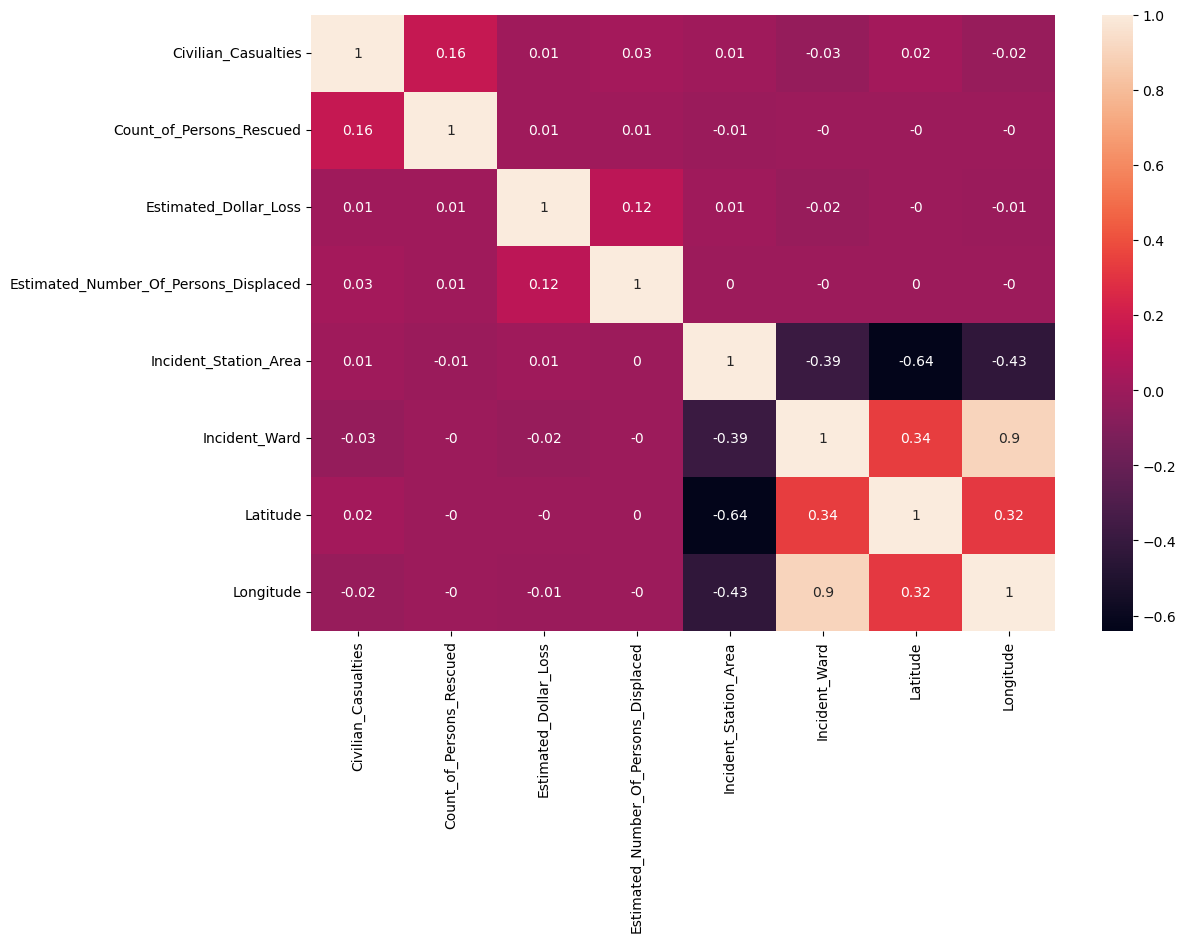

In [7]:
# Correlation with Heatmap
corr = df.select_dtypes('number').corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot= True)

### Data Cleaning

#### Column drop

In [8]:
column_to_drop = ['Business_Impact', 'Estimated_Dollar_Loss', 'Ext_agent_app_or_defer_time']

In [9]:
# Drop not needed columns
df.drop(columns=column_to_drop, inplace= True)

#### Missing Values

<Axes: >

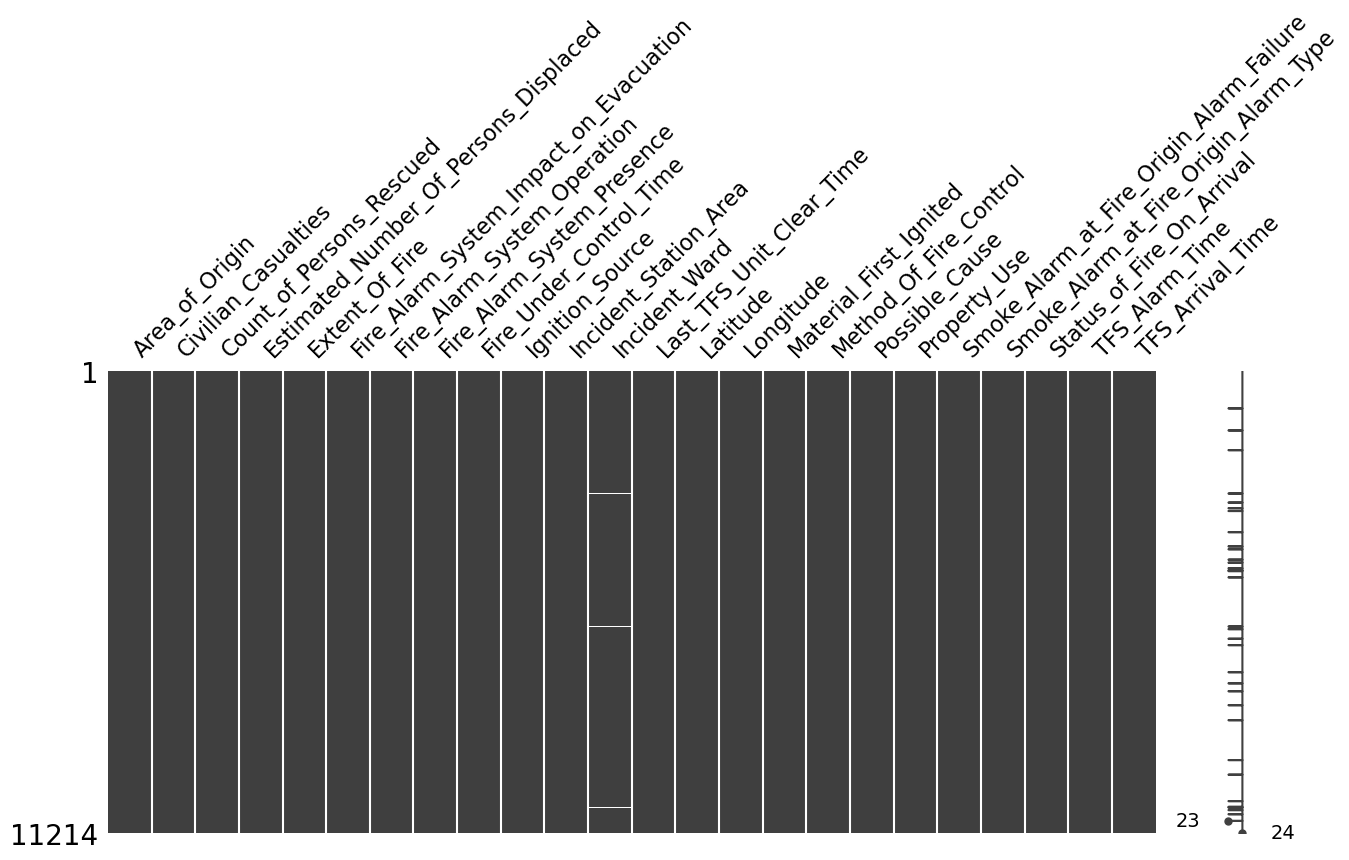

In [10]:
# Missing values on chart
ms.matrix(df, figsize= (15, 6))

In [11]:
# Number of missing values
df.isna().sum()

Area_of_Origin                               0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Number_Of_Persons_Displaced        0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use                                 0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure     0
Smoke_Alarm_at_Fire_Origin_Alarm_Type        0
Status_of_Fir

In [12]:
# Drop all missing values, less than 5 % of dataset
df.dropna(inplace= True)

In [13]:
# Check if drop was successfully
assert (df.isna().sum().sum() == 0), "There are still missing values !"
print('No missing values in dataset !')

No missing values in dataset !


#### Data Type Change

In [14]:
# Change to datetime
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])

In [15]:
# Change to datetime
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

In [16]:
df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(df['Last_TFS_Unit_Clear_Time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11213
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Estimated_Number_Of_Persons_Displaced     11181 non-null  int64         
 4   Extent_Of_Fire                            11181 non-null  object        
 5   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 6   Fire_Alarm_System_Operation               11181 non-null  object        
 7   Fire_Alarm_System_Presence                11181 non-null  object        
 8   Fire_Under_Control_Time                   11181 non-null  object        
 9   Ignition_Source                  

### Feature Enginering

In [18]:
# Value change in civilian_casualties
df.loc[df['Civilian_Casualties'] > 0, ['Civilian_Casualties']] = 1

In [19]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24 17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09
1,Cooking Area or Kitchen,0,28,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24 12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,130,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09 23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49
3,Undetermined (formerly 98),0,12,14,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01 16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,2,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08 16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54


In [20]:
df['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

In [21]:
# Check and change Propert Use column
prop_list = df['Property_Use'].value_counts()

In [22]:
# Create new columns with business or non business value
df['Property_Use_Cat'] = df['Property_Use'].apply(mf.classify_row)

In [23]:
# Create columns with minues between TFS_Arrival_Time - TFS_Alarm_Time
df['Response_Time'] = (df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)

In [24]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Property_Use_Cat,Response_Time
0,Porch or Balcony,0,86,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24 17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,Business,4.550000
1,Cooking Area or Kitchen,0,28,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24 12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,Non-Business,5.183333
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,130,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09 23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,Business,3.700000
3,Undetermined (formerly 98),0,12,14,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01 16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,Non-Business,2.950000
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,2,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08 16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,Business,5.066667


In [25]:
# Creation of Entity for Fire_incidents
es = ft.EntitySet(id = 'fire_inc')

In [26]:
es = es.add_dataframe(dataframe_name ='report', dataframe = df, index='index', time_index= 'TFS_Alarm_Time')

c:\Users\magdz\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_dat

In [27]:
df_ft, feature_defs = ft.dfs(entityset= es, target_dataframe_name='report', max_depth= 1)

In [28]:
df_ft.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,"Living Area (e.g. living, TV, recreation, etc)",0,0,12,Spread to entire room of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Circuit Wiring - Copper,133,12.0,43.71775,-79.48656,Interior Wall/Ceiling,Extinguished by fire department,Design/Construction/Installation/Maintenance D...,Detached Dwelling,Reason for inoperation undetermined,Not applicable - no smoke alarm or presence un...,Fire with no evidence from street,Business,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,Cooking Area or Kitchen,0,0,0,Confined to part of room/area of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,"Stove, Range-top burner",121,16.0,43.73809,-79.42084,"Cooking Oil, Grease",Extinguished by occupant,Unattended,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire extinguished prior to arrival,Business,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,Electrical Systems,0,0,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),No Fire alarm system,Transformer,441,2.0,43.68581,-79.58098,Electrical Wiring Insulation,Extinguished by fire department,"Unintentional, cause undetermined",Hydro Distribution Facility,Not applicable: Alarm operated OR presence/ope...,Not applicable - no smoke alarm or presence un...,Unclassified,Non-Business,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,"Dining or Beverage Area (inc mess, canteen, lu...",0,0,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operation undetermined,Undetermined,"Cord, Cable for Appliance, Electrical Articles",442,11.0,43.70157,-79.50346,Electrical Wiring Insulation,Extinguished by fire department,Electrical Failure,Restaurant (occupant load less than 30 persons),Reason for inoperation undetermined,Type undetermined,Fire with no evidence from street,Non-Business,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,Cooking Area or Kitchen,0,0,2,"Spread to other floors, confined to building","Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Undetermined,244,40.0,43.78050,-79.31621,Undetermined (formerly 98),Extinguished by fire department,"Unintentional, cause undetermined",Detached Dwelling,Not applicable: Alarm operated OR presence/ope...,Battery operated,Fire with smoke showing only - including vehic...,Business,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


In [29]:
df_ft.shape

(11181, 38)

In [30]:
# Check and change category columns to number if they have only numeric values
for col in df_ft.select_dtypes(include= 'category').columns: 
    if mf.is_numeric(df_ft[col]):
        df_ft[col] = pd.to_numeric(df_ft[col])

In [31]:
df_ft.dtypes

Area_of_Origin                              category
Civilian_Casualties                            int64
Count_of_Persons_Rescued                       int64
Estimated_Number_Of_Persons_Displaced          int64
Extent_Of_Fire                              category
Fire_Alarm_System_Impact_on_Evacuation      category
Fire_Alarm_System_Operation                 category
Fire_Alarm_System_Presence                  category
Ignition_Source                             category
Incident_Station_Area                          int64
Incident_Ward                                float64
Latitude                                     float64
Longitude                                    float64
Material_First_Ignited                      category
Method_Of_Fire_Control                      category
Possible_Cause                              category
Property_Use                                category
Smoke_Alarm_at_Fire_Origin_Alarm_Failure    category
Smoke_Alarm_at_Fire_Origin_Alarm_Type       ca

#### Encoding

In [32]:
df.nunique()

index                                       11181
Area_of_Origin                                 73
Civilian_Casualties                             2
Count_of_Persons_Rescued                       14
Estimated_Number_Of_Persons_Displaced          61
Extent_Of_Fire                                 12
Fire_Alarm_System_Impact_on_Evacuation          7
Fire_Alarm_System_Operation                     4
Fire_Alarm_System_Presence                      4
Fire_Under_Control_Time                     11172
Ignition_Source                                82
Incident_Station_Area                          84
Incident_Ward                                  44
Last_TFS_Unit_Clear_Time                    11180
Latitude                                     6054
Longitude                                    6382
Material_First_Ignited                         54
Method_Of_Fire_Control                          5
Possible_Cause                                 24
Property_Use                                  217


In [33]:
# Label Encoding
lab_encoder = LabelEncoder()

In [34]:
# Label Encodging for one column
df_ft['Property_Use_Cat'] = lab_encoder.fit_transform(df_ft['Property_Use_Cat'])
df_ft.drop(columns= 'Property_Use')

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,"Living Area (e.g. living, TV, recreation, etc)",0,0,12,Spread to entire room of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Circuit Wiring - Copper,133,12.0,43.717750,-79.486560,Interior Wall/Ceiling,Extinguished by fire department,Design/Construction/Installation/Maintenance D...,Reason for inoperation undetermined,Not applicable - no smoke alarm or presence un...,Fire with no evidence from street,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,Cooking Area or Kitchen,0,0,0,Confined to part of room/area of origin,All persons (at risk of injury) evacuated as a...,Fire alarm system operated,Fire alarm system present,"Stove, Range-top burner",121,16.0,43.738090,-79.420840,"Cooking Oil, Grease",Extinguished by occupant,Unattended,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire extinguished prior to arrival,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,Electrical Systems,0,0,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),No Fire alarm system,Transformer,441,2.0,43.685810,-79.580980,Electrical Wiring Insulation,Extinguished by fire department,"Unintentional, cause undetermined",Not applicable: Alarm operated OR presence/ope...,Not applicable - no smoke alarm or presence un...,Unclassified,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,"Dining or Beverage Area (inc mess, canteen, lu...",0,0,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operation undetermined,Undetermined,"Cord, Cable for Appliance, Electrical Articles",442,11.0,43.701570,-79.503460,Electrical Wiring Insulation,Extinguished by fire department,Electrical Failure,Reason for inoperation undetermined,Type undetermined,Fire with no evidence from street,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,Cooking Area or Kitchen,0,0,2,"Spread to other floors, confined to building","Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,Undetermined,244,40.0,43.780500,-79.316210,Undetermined (formerly 98),Extinguished by fire department,"Unintentional, cause undetermined",Not applicable: Alarm operated OR presence/ope...,Battery operated,Fire with smoke showing only - including vehic...,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,Porch or Balcony,0,0,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),Not applicable (bldg not classified by OBC OR ...,"Smoker's Articles (eg. cigarettes, cigars, pip...",324,14.0,43.662973,-79.345789,Other,Extinguished by fire department,Improperly Discarded,Not applicable: Alarm operated OR presence/ope...,Not applicable - no smoke 

In [35]:
df_ft['Property_Use_Cat'].value_counts()

Property_Use_Cat
0    7852
1    3329
Name: count, dtype: int64

In [37]:
columns_to_lab_encode = df_ft.select_dtypes(include='category').columns
columns_to_lab_encode

Index(['Area_of_Origin', 'Extent_Of_Fire',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation',
       'Fire_Alarm_System_Presence', 'Ignition_Source',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival'],
      dtype='object')

In [39]:
mf.encode_labels(df_ft, columns_to_lab_encode, lab_encoder)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,43.717750,-79.486560,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,43.738090,-79.420840,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,43.685810,-79.580980,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,43.701570,-79.503460,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,43.780500,-79.316210,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,51,0,0,0,0,3,3,2,65,324,14.0,43.662973,-79.345789,31,2,6,165,4,3,3,0,3.383333,30,30,30,30,6,6,6,6,6,6,6,6,2019,2019,2019,2019
1230,13,0,0,0,0,4,0,0,75,222,20.0,43.712046,-79.281003,45,3,14,17,4,4,1,1,3.383333,30,30,30,30,6,6,6,6,6,6,6,6,2019,2019,2019,2019
1231,11,0,0,2,1,3,1,0,69,334,10.0,43.639946,-79.395628,36,2,4,125,4,2,3,0,3.766667,30,30,30,30,6,6,6,6,6,6,6,6,2019,2019,2019,2019


In [41]:
df_ft['Fire_Alarm_System_Operation'].value_counts()

Fire_Alarm_System_Operation
1    4513
3    3858
2    1417
0    1393
Name: count, dtype: int64

In [42]:
df_ft['Fire_Alarm_System_Presence'].value_counts()

Fire_Alarm_System_Presence
0    6208
2    1935
1    1788
3    1250
Name: count, dtype: int64

In [43]:
df_ft.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,43.71775,-79.48656,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,43.73809,-79.42084,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,43.68581,-79.58098,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,43.70157,-79.50346,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,43.78050,-79.31621,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


### Model Preparation

In [44]:
# Copy of dataset
df_mode = df_ft.copy()

In [45]:
# Save new dataset to csv
df_mode.to_csv('CSV/df_mode.csv')

In [46]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,43.71775,-79.48656,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,43.73809,-79.42084,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,43.68581,-79.58098,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,43.70157,-79.50346,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,43.78050,-79.31621,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


In [47]:
df_mode.sample(10)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7283,11,1,0,0,1,3,3,1,69,443,4.0,43.682310,-79.518850,10,2,17,4,4,1,2,0,5.933333,1,1,1,1,3,3,3,3,2,2,2,2,2017,2017,2017,2017
2324,11,0,0,0,1,0,1,0,69,213,42.0,43.805580,-79.220920,10,3,17,1,4,1,1,1,5.450000,7,7,7,7,10,10,10,10,0,0,0,0,2013,2013,2013,2013
6810,68,0,0,0,0,3,3,2,75,326,30.0,43.649680,-79.342400,49,2,20,131,7,3,6,1,5.716667,30,30,30,30,10,10,10,10,3,3,3,3,2014,2014,2014,2014
5292,11,0,0,0,1,6,3,3,48,321,26.0,43.714450,-79.365140,7,3,20,165,6,1,1,0,5.283333,18,18,18,18,12,12,12,12,3,3,3,3,2014,2014,2014,2014
3022,26,0,0,5,1,4,3,2,3,343,17.0,43.674140,-79.435930,26,2,10,4,0,0,5,0,5.116667,9,9,9,9,3,3,3,3,2,2,2,2,2011,2011,2011,2011
74,11,0,2,2,9,0,1,0,69,121,25.0,43.760050,-79.395380,10,2,17,125,4,1,2,0,5.683333,23,23,23,23,5,5,5,5,2,2,2,2,2012,2012,2012,2012
2150,1,0,0,0,1,3,3,1,45,223,20.0,43.717432,-79.231308,10,2,13,34,4,3,5,0,4.000000,7,7,7,7,4,4,4,4,5,5,5,5,2018,2018,2018,2018
6053,51,0,0,0,1,3,3,1,65,242,41.0,43.822500,-79.273990,53,2,5,4,4,0,5,0,7.066667,23,23,23,23,7,7,7,7,5,5,5,5,2016,2016,2016,2016
7868,67,0,0,0,1,3,3,1,75,235,34.0,43.724670,-79.317730,45,2,19,215,4,3,3,1,4.533333,25,25,25,25,8,8,8,8,4,4,4,4,2017,2017,2017,2017


In [57]:
df_ft['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

### Base Model

#### Train and Test Split

In [48]:
# Split Data for X and y
X = df_mode.drop(columns= 'Civilian_Casualties')
y = df_mode['Civilian_Casualties'].values.ravel()

In [58]:
y.shape

(11181,)

In [49]:
# Preparation of test and training data
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [50]:
# Model
log_reg = LogisticRegression(random_state= 42)

In [51]:
# Fit train data
log_reg.fit(X_trainb, y_trainb)

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [52]:
# Prediction with test data
y_pred = log_reg.predict(X_testb)

#### Confusion Matrix

In [53]:
# Confision matrix
cnf_matrix = metrics.confusion_matrix(y_testb, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

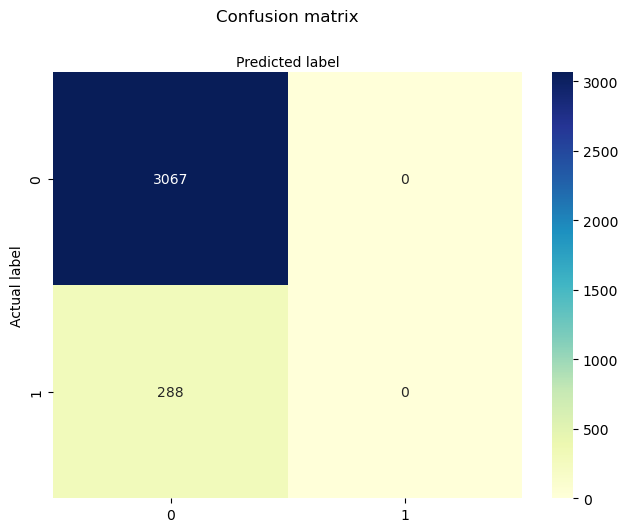

In [54]:
# Heatmap to show confision matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Evaluation Metrics

In [55]:
# Report with classification metrics
target_names = ['No casulties', 'Casulties']
report = classification_report(y_testb, y_pred, target_names = target_names, output_dict=True)
df_result = pd.DataFrame(report).transpose()

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
df_result

,precision,recall,f1-score,support
No casulties,0.914158,1.000000,0.955154,3067.000000
Casulties,0.000000,0.000000,0.000000,288.000000
accuracy,0.914158,0.914158,0.914158,0.914158
macro avg,0.457079,0.500000,0.477577,3355.000000
weighted avg,0.835685,0.914158,0.873162,3355.000000


#### ROC Curve

In [59]:
def roc_curve(test, prob) :
    fpr, tpr, _ = metrics.roc_curve(test,  prob)
    auc = metrics.roc_auc_score(test, prob)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

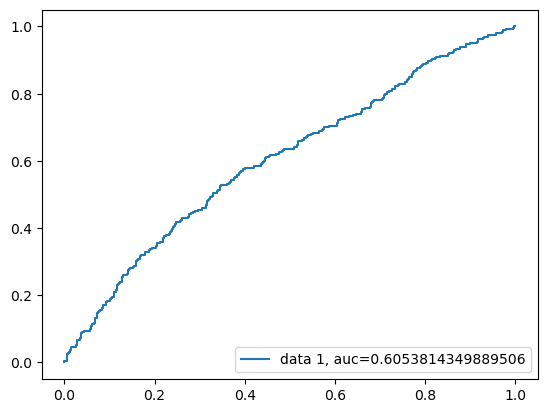

In [60]:
# Receiver Operating Characteristic on chart
y_pred_proba = log_reg.predict_proba(X_testb)[::,1]
roc_curve(y_testb, y_pred_proba)

### Pre Processing


In [61]:
# Copy of the last dataset
dfp = df_mode.copy()

In [62]:
dfp.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7706,31,0,0,12,9,3,3,2,10,133,12.0,43.71775,-79.48656,22,2,1,34,6,3,2,0,7.666667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7690,11,0,0,0,1,0,1,0,69,121,16.0,43.73809,-79.42084,10,3,17,125,4,1,1,0,7.366667,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2912,18,0,0,0,0,3,3,1,73,441,2.0,43.68581,-79.58098,14,2,20,63,4,3,7,1,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
7716,15,0,0,0,0,4,2,3,12,442,11.0,43.70157,-79.50346,14,2,2,149,6,4,2,1,5.150000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011
2913,11,0,0,2,10,3,3,2,75,244,40.0,43.78050,-79.31621,49,2,20,34,4,0,3,0,6.250000,1,1,1,1,1,1,1,1,5,5,5,5,2011,2011,2011,2011


In [63]:
dfp.describe()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
count,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000
mean,34.454521,0.084787,0.062338,17.055451,1.639925,3.273052,1.692246,0.841427,53.941597,288.427600,19.582685,43.705074,-79.403284,29.327430,2.270817,11.064037,95.666846,4.597621,1.944907,2.492443,0.297737,5.000817,15.886683,15.889008,15.880959,15.878276,6.217959,6.213398,6.217691,6.217870,3.066005,3.059208,3.068867,3.070477,2014.751185,2014.751722,2014.751185,2014.751185
std,22.255735,0.278576,0.964001,118.159166,2.878461,1.891875,1.073507,1.072583,24.080762,107.452027,11.762782,0.051112,0.101082,15.978273,0.726693,6.924097,55.561304,1.534012,1.404824,1.507661,0.457284,3.093917,8.736909,8.737400,8.737416,8.737635,3.422040,3.421505,3.422071,3.422164,1.993758,1.993657,1.994155,1.994278,2.469850,2.469868,2.469850,2.469850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,1.000000,43.588926,-79.635241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,2011.000000,2011.000000,2011.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,44.000000,221.000000,10.000000,43.662430,-79.479021,14.000000,2.000000,5.000000,34.000000,4.000000,1.000000,1.000000,0.000000,4.066667,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000,2013.000000
50%,31.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,65.000000,314.000000,19.000000,43.697000,-79.403870,31.000000,2.000000,10.000000,125.000000,4.000000,2.000000,2.000000,0.000000,4.850000,16.000000,16.000000,16.000000,16.000000,6.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,3.000000,2015.000000,2015.000000,2015.000000,2015.000000
75%,57.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,2.000000,75.000000,411.000000,28.000000,43.747530,-79.337150,45.000000,3.000000,19.000000,125.000000,5.000000,3.000000,3.000000,1.000000,5.766667,23.000000,23.000000,23.000000,23.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,5.000000,5.000000,2017.000000,2017.000000,2017.000000,2017.000000
max,72.000000,1.000000,86.000000,999.000000,11.000000,6.000000,3.000000,3.000000,81.000000,445.000000,44.000000,43.846200,-79.124410,53.000000,4.000000,23.000000,216.000000,10.000000,5.000000,7.000000,1.000000,297.850000,31.000000,31.000000,31.000000,31.000000,12.000000,12.000000,12.000000,12.000000,6.000000,6.000000,6.000000,6.000000,2019.000000,2019.000000,2019.0000

#### Outliners Check

In [64]:
# List of lower outliners with treshold and number of values
mf.lower_treshholders(dfp)

Column: Method_Of_Fire_Control
Lower treshold 0.5
Ilosc wartosci ponizej dolnego outlinera: 253

Column: Smoke_Alarm_at_Fire_Origin_Alarm_Failure
Lower treshold 2.5
Ilosc wartosci ponizej dolnego outlinera: 321

Column: Response_Time
Lower treshold 1.5166666666666662
Ilosc wartosci ponizej dolnego outlinera: 32



In [65]:
# List of upper outliners with treshold and number of values
mf.upper_treshholders(dfp)

Column: Civilian_Casualties
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 948

Column: Count_of_Persons_Rescued
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 327

Column: Estimated_Number_Of_Persons_Displaced
Upper treshold 2.5
Ilosc wartosci powyzej górnego outlinera: 2079

Column: Extent_Of_Fire
Upper treshold 2.5
Ilosc wartosci powyzej górnego outlinera: 1660

Column: Smoke_Alarm_at_Fire_Origin_Alarm_Failure
Upper treshold 6.5
Ilosc wartosci powyzej górnego outlinera: 1709

Column: Status_of_Fire_On_Arrival
Upper treshold 6.0
Ilosc wartosci powyzej górnego outlinera: 173

Column: Response_Time
Upper treshold 8.316666666666666
Ilosc wartosci powyzej górnego outlinera: 178



In [70]:
dfp.dtypes

Area_of_Origin                                int32
Civilian_Casualties                           int64
Count_of_Persons_Rescued                      int64
Estimated_Number_Of_Persons_Displaced       float64
Extent_Of_Fire                                int32
Fire_Alarm_System_Impact_on_Evacuation        int32
Fire_Alarm_System_Operation                   int32
Fire_Alarm_System_Presence                    int32
Ignition_Source                               int32
Incident_Station_Area                         int64
Incident_Ward                               float64
Latitude                                    float64
Longitude                                   float64
Material_First_Ignited                        int32
Method_Of_Fire_Control                        int32
Possible_Cause                                int32
Property_Use                                  int32
Smoke_Alarm_at_Fire_Origin_Alarm_Failure      int32
Smoke_Alarm_at_Fire_Origin_Alarm_Type         int32
Status_of_Fi

In [66]:
# Change outliners to boarder value

lower_col = ['Method_Of_Fire_Control', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Response_Time']
upper_col = ['Estimated_Number_Of_Persons_Displaced', 'Extent_Of_Fire', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Status_of_Fire_On_Arrival', 'Response_Time']


In [72]:
# Lower tresh
for col in lower_col :
    dfp[col] = np.where(dfp[col] < mf.lower_tresh(dfp[col]), mf.lower_tresh(dfp[col]), dfp[col])

In [73]:
# Upper Tresh
for col in upper_col :
    dfp[col] = np.where(dfp[col] > mf.upper_tresh(dfp[col]), mf.upper_tresh(dfp[col]), dfp[col])

In [74]:
# List of lower outliners with treshold and number of values
mf.lower_treshholders(dfp)

In [75]:
# List of upper outliners with treshold and number of values
mf.upper_treshholders(dfp)

Column: Civilian_Casualties
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 948

Column: Count_of_Persons_Rescued
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 327



In [76]:
dfp.sample(5)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6035,11,0,0,0.0,1.0,4,3,1,69,141,8.0,43.76046,-79.50978,10,3.0,17,4,4.0,0,1.0,0,6.783333,3,3,3,3,9,9,9,9,0,0,0,0,2012,2012,2012,2012
5111,62,0,0,2.5,1.0,0,3,1,10,345,19.0,43.66994,-79.43155,14,2.0,2,165,4.0,0,2.0,0,4.066667,16,16,16,16,2,2,2,2,0,0,0,0,2015,2015,2015,2015
2271,66,0,0,0.0,0.0,3,3,2,75,425,13.0,43.65598,-79.47442,49,2.0,19,34,3.0,3,3.0,0,5.383333,16,16,16,16,6,6,6,6,3,3,3,3,2016,2016,2016,2016
8949,52,0,0,2.5,0.0,0,1,0,13,411,7.0,43.76256,-79.55610,44,2.0,19,83,4.0,1,6.0,1,6.066667,1,1,1,1,10,10,10,10,5,5,5,5,2011,2011,2011,2011
8509,25,0,0,0.0,1.0,3,3,1,61,413,1.0,43.75633,-79.59444,31,2.0,7,34,6.5,1,3.0,0,6.416667,1,2,1,1,4,4,4,4,4,5,4,4,2016,2016,2016,2016


In [77]:
dfp.describe()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,Property_Use_Cat,Response_Time,DAY(Fire_Under_Control_Time),DAY(Last_TFS_Unit_Clear_Time),DAY(TFS_Alarm_Time),DAY(TFS_Arrival_Time),MONTH(Fire_Under_Control_Time),MONTH(Last_TFS_Unit_Clear_Time),MONTH(TFS_Alarm_Time),MONTH(TFS_Arrival_Time),WEEKDAY(Fire_Under_Control_Time),WEEKDAY(Last_TFS_Unit_Clear_Time),WEEKDAY(TFS_Alarm_Time),WEEKDAY(TFS_Arrival_Time),YEAR(Fire_Under_Control_Time),YEAR(Last_TFS_Unit_Clear_Time),YEAR(TFS_Alarm_Time),YEAR(TFS_Arrival_Time)
count,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000
mean,34.454521,0.084787,0.062338,0.640327,0.796172,3.273052,1.692246,0.841427,53.941597,288.427600,19.582685,43.705074,-79.403284,29.327430,2.282130,11.064037,95.666846,4.486182,1.944907,2.476970,0.297737,4.954044,15.886683,15.889008,15.880959,15.878276,6.217959,6.213398,6.217691,6.217870,3.066005,3.059208,3.068867,3.070477,2014.751185,2014.751722,2014.751185,2014.751185
std,22.255735,0.278576,0.964001,1.023137,0.883129,1.891875,1.073507,1.072583,24.080762,107.452027,11.762782,0.051112,0.101082,15.978273,0.694424,6.924097,55.561304,1.036093,1.404824,1.465871,0.457284,1.286376,8.736909,8.737400,8.737416,8.737635,3.422040,3.421505,3.422071,3.422164,1.993758,1.993657,1.994155,1.994278,2.469850,2.469868,2.469850,2.469850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,1.000000,43.588926,-79.635241,0.000000,0.500000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,1.516667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,2011.000000,2011.000000,2011.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,44.000000,221.000000,10.000000,43.662430,-79.479021,14.000000,2.000000,5.000000,34.000000,4.000000,1.000000,1.000000,0.000000,4.066667,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,2013.000000,2013.000000,2013.000000
50%,31.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,65.000000,314.000000,19.000000,43.697000,-79.403870,31.000000,2.000000,10.000000,125.000000,4.000000,2.000000,2.000000,0.000000,4.850000,16.000000,16.000000,16.000000,16.000000,6.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,3.000000,2015.000000,2015.000000,2015.000000,2015.000000
75%,57.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,2.000000,75.000000,411.000000,28.000000,43.747530,-79.337150,45.000000,3.000000,19.000000,125.000000,5.000000,3.000000,3.000000,1.000000,5.766667,23.000000,23.000000,23.000000,23.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,5.000000,5.000000,2017.000000,2017.000000,2017.000000,2017.000000
max,72.000000,1.000000,86.000000,2.500000,2.500000,6.000000,3.000000,3.000000,81.000000,445.000000,44.000000,43.846200,-79.124410,53.000000,4.000000,23.000000,216.000000,6.500000,5.000000,6.000000,1.000000,8.316667,31.000000,31.000000,31.000000,31.000000,12.000000,12.000000,12.000000,12.000000,6.000000,6.000000,6.000000,6.000000,2019.000000,2019.000000,2019.000000,2019.0

#### Data Split

In [78]:
# Split Data for X and y
X = dfp.drop(columns= 'Civilian_Casualties')
y = dfp['Civilian_Casualties'].values.ravel()

In [79]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [80]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8944, 37) (8944,)
(2237, 37) (2237,)


#### Model Preperations

In [81]:
dfp['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

##### Class Imbalance

In [82]:
# Synthetic oversampling of training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)


In [83]:
# Synthetic oversampling of training data using ADASYN on SMOTE samples
adasyn = ADASYN(random_state= 42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_resampled_smote, y_train_resampled_smote)

In [85]:
print(X_train_resampled.shape, y_train_resampled.shape)
print(X_test.shape, y_test.shape)

(16390, 37) (16390,)
(2237, 37) (2237,)


In [86]:
pd.DataFrame(y_train_resampled).value_counts()

0    8195
1    8195
Name: count, dtype: int64

##### Pipeline Inits

In [84]:
# MinMax normalizacion scaler
scaler = MinMaxScaler()

In [87]:
# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)

In [88]:
#RFECV init with model and CV steps
feature_selector  = RFECV(estimator=RandomForestClassifier(random_state=42), cv=5)

### Models

#### Logistic Regression

In [89]:
# Model Init
logistic_regression = LogisticRegression()


In [90]:
pipeline = Pipeline([
    ('scaler', scaler),
    ('feature_selection', feature_selector),
    ('classifier', logistic_regression)
])

In [91]:
def objective(trial):
    # Params for model
    params = {
        'C': trial.suggest_float('C', 0.0001, 100),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'multi_class': trial.suggest_categorical('multi_class', ['auto', 'ovr', 'multinomial'])
    }
    
    model = LogisticRegression(**params)
    
    # cross validation
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    score = cv_scores.mean()
    return score

In [92]:
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1, timeout=300)

[I 2024-06-07 16:07:57,596] A new study created in memory with name: no-name-2dfdabfb-3005-4fbb-aff1-e3b1adc38c30
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

In [93]:
# Wyświetlenie najlepszych wyników
print('Najlepsze wyniki:', study.best_params)

Najlepsze wyniki: {'C': 61.78045103161706, 'max_iter': 987, 'multi_class': 'ovr'}


In [94]:
best_params = study.best_params
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_resampled, y_train_resampled)

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=61.78045103161706, max_iter=987, multi_class='ovr')

In [95]:
y_pred_log = best_model.predict(X_test)

In [96]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_log, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

Classification Report:
              precision    recall  f1-score     support
No casulties   0.948617  0.706575  0.809899  2038.00000
Casulties      0.168289  0.608040  0.263617   199.00000
accuracy       0.697810  0.697810  0.697810     0.69781
macro avg      0.558453  0.657308  0.536758  2237.00000
weighted avg   0.879200  0.697810  0.761302  2237.00000


In [97]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Confusion Matrix:
[[1440  598]
 [  78  121]]


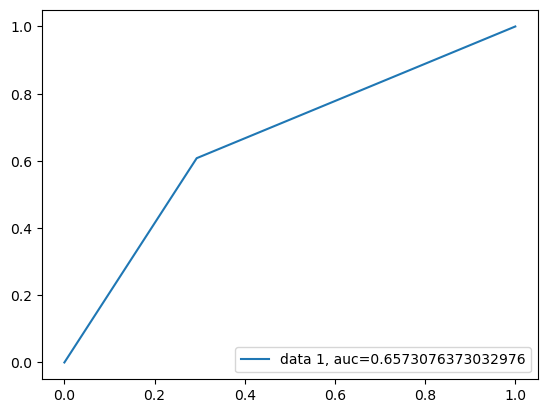

In [98]:
roc_curve(y_test, y_pred_log)

#### Decision Tree

In [99]:
dec_tree_model = DecisionTreeClassifier()

In [100]:
pipeline = Pipeline([
    ('scaler', scaler),
    ('feature_selector', feature_selector),
    ('classifier', dec_tree_model)
])

In [ ]:
# Model Init
dc_tree_model = DecisionTreeClassifier()

# Patameters
dc_tree_param_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5 , 10, 12],
    'min_samples_split' : [2, 5, 10 , 15],
    'min_samples_leaf' : [1, 2, 5, 10],
    'random_state' : [42]
}

In [ ]:
#RFECV init with model and CV steps

rfecv_dc_tree = RFECV(estimator= dc_tree_model, step= 1, cv = 5, scoring= 'accuracy')

In [ ]:
# Matching RFECV to training data
rfecv_dc_tree.fit(X_resample, y_resample)

RFECV(cv=5, estimator=DecisionTreeClassifier(), scoring='accuracy')

In [ ]:
# Selected Features
selected_features = rfecv_dc_tree.n_features_
print("Wybrane cechy:", selected_features)

Wybrane cechy: 22


In [ ]:
# Feature selection
X_train_selected = rfecv_dc_tree.transform(X_resample)
X_test_selected = rfecv_dc_tree.transform(X_test)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_selected.shape}, Rozmiar y_train: {y_resample.shape}")
print(f"Rozmiar X_test_selected: {X_test_selected.shape}, Rozmiar y_test: {y_test.shape}")

Rozmiar X_train_selected: (16339, 22), Rozmiar y_train: (16339,)
Rozmiar X_test_selected: (2237, 22), Rozmiar y_test: (2237,)


In [ ]:
grid_search_dc_tree = GridSearchCV(estimator= dc_tree_model, param_grid= dc_tree_param_grid, cv= 5, scoring= 'accuracy')

In [ ]:
grid_search_dc_tree.fit(X_train_selected, y_resample)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 10, 12],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [42]},
             scoring='accuracy')

In [ ]:
# Best hyperparameters found
best_params = grid_search_dc_tree.best_params_
print("Najlepsze hiperparametry:", best_params)

Najlepsze hiperparametry: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
# Model evaluation on test data
accuracy = grid_search_dc_tree.best_estimator_.score(X_test_selected, y_test)
print("Dokładność modelu na danych testowych:", accuracy)

Dokładność modelu na danych testowych: 0.7957085382208314


In [ ]:
y_pred_dtree = grid_search_dc_tree.best_estimator_.predict(X_test_selected)

In [ ]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_dtree, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

Classification Report:
              precision    recall  f1-score      support
No casulties   0.935961  0.834146  0.882125  2050.000000
Casulties      0.170732  0.374332  0.234506   187.000000
accuracy       0.795709  0.795709  0.795709     0.795709
macro avg      0.553346  0.604239  0.558316  2237.000000
weighted avg   0.871992  0.795709  0.827988  2237.000000


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))

Confusion Matrix:
[[1710  340]
 [ 117   70]]


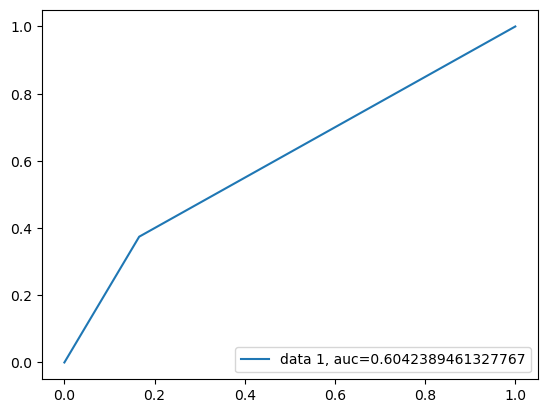

In [ ]:
roc_curve(y_test, y_pred_dtree)

#### SVC

In [ ]:
# Model Init
svc = LinearSVC(random_state= 42, tol=1e-5, max_iter= 10000)

# Patameters
svc_param_grid = {
    'loss' : ['hinge', 'squared_hinge'],
    'C' : [0.1, 1.0, 10.0],
    'penalty' : ['l1', 'l2'],
    'dual' : [True, False]
}

In [ ]:
#RFECV init with model and CV steps
rfecv_svc = RFECV(estimator= svc, step= 1, cv = 5, scoring='accuracy')

In [ ]:
# Matching RFECV to training data
rfecv_svc.fit(X_resample, y_resample)

RFECV(cv=5, estimator=LinearSVC(random_state=42, tol=1e-05), scoring='accuracy')

In [ ]:
# Selected Features
selected_features = rfecv_svc.n_features_
print("Wybrane cechy:", selected_features)

Wybrane cechy: 14


In [ ]:
# Feature selection
X_train_selected = rfecv_svc.transform(X_resample)
X_test_selected = rfecv_svc.transform(X_test)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_selected.shape}, Rozmiar y_train: {y_resample.shape}")
print(f"Rozmiar X_test_selected: {X_test_selected.shape}, Rozmiar y_test: {y_test.shape}")

Rozmiar X_train_selected: (16339, 14), Rozmiar y_train: (16339,)
Rozmiar X_test_selected: (2237, 14), Rozmiar y_test: (2237,)


In [ ]:
# Create GridSearchCV object with model, hyperparameter space and RFECV
grid_search_svc = GridSearchCV(estimator= svc, param_grid= svc_param_grid, cv= 5, scoring= 'accuracy')

In [ ]:
grid_search_svc.fit(X_train_selected, y_resample)

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42, tol=1e-05),
             param_grid={'C': [0.1, 1.0, 10.0], 'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Best hyperparameters found
best_params = grid_search_svc.best_params_
print("Najlepsze hiperparametry:", best_params)

Najlepsze hiperparametry: {'C': 10.0, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}


In [ ]:
# Model evaluation on test data
accuracy = grid_search_svc.best_estimator_.score(X_test_selected, y_test)
print("Dokładność modelu na danych testowych:", accuracy)

Dokładność modelu na danych testowych: 0.705409029950827


In [ ]:
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test_selected)

In [ ]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_svc, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

Classification Report:
              precision    recall  f1-score      support
No casulties   0.956066  0.711220  0.815664  2050.000000
Casulties      0.168539  0.641711  0.266963   187.000000
accuracy       0.705409  0.705409  0.705409     0.705409
macro avg      0.562302  0.676465  0.541314  2237.000000
weighted avg   0.890233  0.705409  0.769796  2237.000000


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

Confusion Matrix:
[[1458  592]
 [  67  120]]


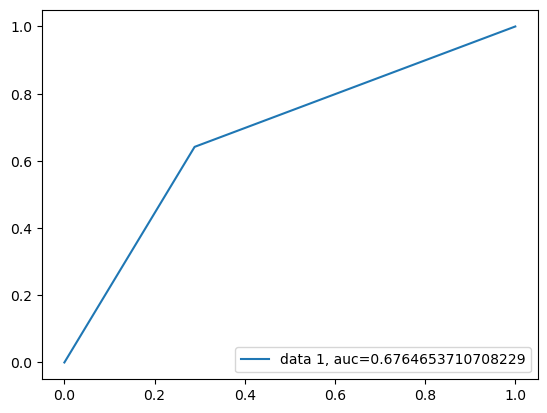

In [ ]:
roc_curve(y_test, y_pred_svc)

#### Naive Bayes

In [ ]:
# Model
nb = MultinomialNB()

nb_param_grid = {
    'alpha' : [0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_prior' : [True, False]
}

In [ ]:
# Log. Reg for feature sel.
log_reg_sel = LogisticRegression(max_iter=1000)

In [ ]:
log_reg_sel.fit(X_resample, y_resample)

LogisticRegression(max_iter=1000)

In [ ]:
sfm = SelectFromModel(log_reg_sel, threshold=0.1)
X_train_selected = sfm.fit_transform(X_resample, y_resample)
X_test_selected = sfm.transform(X_test)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_selected.shape}, Rozmiar y_train: {y_resample.shape}")
print(f"Rozmiar X_test_selected: {X_test_selected.shape}, Rozmiar y_test: {y_test.shape}")

Rozmiar X_train_selected: (16339, 22), Rozmiar y_train: (16339,)
Rozmiar X_test_selected: (2237, 22), Rozmiar y_test: (2237,)


In [ ]:
# Create GridSearchCV object with model, hyperparameter space and RFECV
grid_search_nb = GridSearchCV(estimator= nb, param_grid= nb_param_grid, cv= 5, scoring= 'accuracy')

In [ ]:
grid_search_nb.fit(X_train_selected, y_resample)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [ ]:
# Best hyperparameters found
best_params = grid_search_nb.best_params_
print("Najlepsze hiperparametry:", best_params)

Najlepsze hiperparametry: {'alpha': 0.1, 'fit_prior': True}


In [ ]:
# Model evaluation on test data
accuracy = grid_search_nb.best_estimator_.score(X_test_selected, y_test)
print("Dokładność modelu na danych testowych:", accuracy)

Dokładność modelu na danych testowych: 0.5225748770675012


In [ ]:
y_pred_nb = grid_search_nb.best_estimator_.predict(X_test_selected)

In [ ]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_nb, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

Classification Report:
              precision    recall  f1-score      support
No casulties   0.963208  0.498049  0.656592  2050.000000
Casulties      0.125743  0.791444  0.217009   187.000000
accuracy       0.522575  0.522575  0.522575     0.522575
macro avg      0.544475  0.644746  0.436800  2237.000000
weighted avg   0.893200  0.522575  0.619845  2237.000000


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
[[1021 1029]
 [  39  148]]


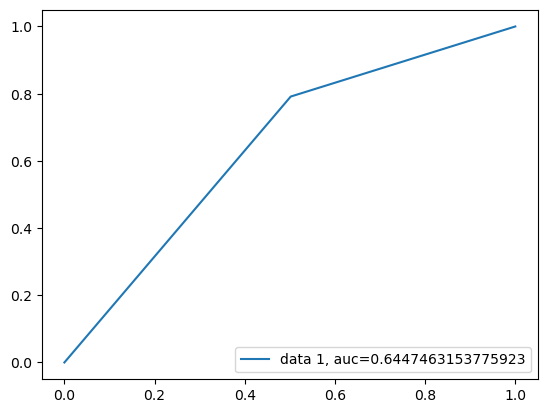

In [ ]:
roc_curve(y_test, y_pred_nb)

#### XGBoost


In [ ]:
# Model Init
xgb = XGBClassifier(tree_method='hist', n_jobs = -1)

xgb_param_grid = {
    'n_estimators' : [1, 2, 3, 4, 5],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth' : [2, 4, 6, 8],
    'gamma' : [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha' : [0, 0.001, 0.005, 0.01, 0.05],
    'reg_lambda' : [0, 0.001, 0.005, 0.01, 0.05]
}

In [ ]:
#RFECV init with model and CV steps
rfecv_xgb = RFECV(estimator= xgb, step= 1, cv = 5, scoring='accuracy')

In [ ]:
# Matching RFECV to training data
rfecv_xgb.fit(X_resample, y_resample)

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...),
      scoring='accuracy')

In [ ]:
# Selected Features
selected_features = rfecv_xgb.n_features_
print("Wybrane cechy:", selected_features)

Wybrane cechy: 23


In [ ]:
# Feature selection
X_train_selected = rfecv_xgb.transform(X_resample)
X_test_selected = rfecv_xgb.transform(X_test)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_selected.shape}, Rozmiar y_train: {y_resample.shape}")
print(f"Rozmiar X_test_selected: {X_test_selected.shape}, Rozmiar y_test: {y_test.shape}")

Rozmiar X_train_selected: (16339, 23), Rozmiar y_train: (16339,)
Rozmiar X_test_selected: (2237, 23), Rozmiar y_test: (2237,)


In [ ]:
# Obliczenie liczby próbek dla 1% oryginalnego zestawu danych
n_samples_1percent = int(0.01 * len(X_train_selected))

In [ ]:
# Split data for 1000 samples
X_train_sample, y_train_sample = resample(X_train_selected, y_resample, n_samples= n_samples_1percent, random_state= 42)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_sample.shape}, Rozmiar y_train: {y_train_sample.shape}")


Rozmiar X_train_selected: (163, 23), Rozmiar y_train: (163,)


In [ ]:
# Create GridSearchCV object with model, hyperparameter space and RFECV
grid_search_xgb = GridSearchCV(estimator= xgb, param_grid= xgb_param_grid, cv= 5, scoring= 'accuracy')

In [ ]:
# Find Best Params on sample dataset
grid_search_xgb.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [1, 2, 3, 4, 5],
                         'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
                         'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05]},
             scoring='accuracy')

In [ ]:
# Inicjalizacja obiektu PCA
min_components = min(X_train_selected.shape[0], X_train_selected.shape[1])
pca = PCA(n_components=min_components)

In [ ]:
# Dopasowanie PCA do danych treningowych i transformacja danych
X_train_pca = pca.fit_transform(X_train_selected)

In [ ]:
print(f"Rozmiar X_train_selected: {X_train_pca.shape}")

: 

In [ ]:
# Create GridSearchCV object with model, hyperparameter space and RFECV
grid_search_xgb_pca = GridSearchCV(estimator= xgb, param_grid= xgb_param_grid, cv= 5, scoring= 'accuracy')

In [ ]:
# Find Best Params on sample dataset - PCA
grid_search_xgb_pca.fit(X_train_pca, y_resample)

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x000001EC9CB8A150>>
Traceback (most recent call last):
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 641, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 557, in _handle_exception
    return fn()
           ^^^^
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\data.py", line 1280, in next
    input_data(**self.kwargs)
  File "c:\Users\magdz\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    re

: 

: 

In [ ]:
# Best hyperparameters found - Sample
best_params = grid_search_xgb.best_params_
print("Najlepsze hiperparametry:", best_params)

Najlepsze hiperparametry: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 5, 'reg_alpha': 0, 'reg_lambda': 0}


In [ ]:
# Best hyperparameters found - PCA
best_params = grid_search_xgb_pca.best_params_
print("Najlepsze hiperparametry:", best_params)

In [ ]:
# Użycie najlepszych parametrów do wytrenowania modelu na pełnym zbiorze danych
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

In [ ]:
# Model evaluation on test data
accuracy = xgb_best.best_estimator_.score(X_test_selected, y_test)
print("Dokładność modelu na danych testowych:", accuracy)

In [ ]:
y_pred_xgb = xgb_best.best_estimator_.predict(X_test_selected)

In [ ]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_xgb, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

In [ ]:
print("Classification Report:")
classification_decision = classification_report(y_test, y_pred_xgb, target_names = target_names, output_dict=True)
print(pd.DataFrame(classification_decision).transpose())

In [ ]:
roc_curve(y_test, y_pred_xgb)